Saved BERTScore metrics visualization
Saved Similarity metrics visualization
Saved ROUGE-1 metrics visualization
Saved ROUGE-2 metrics visualization
Saved ROUGE-L metrics visualization
Saved F1 comparison visualization
Saved similarity metrics visualization
                        file_name  bertscore_precision  bertscore_recall  \
0  test_end_to_end_gemma3:12b.csv             0.618141          0.614516   
1  test_end_to_end_gemma3:27b.csv             0.618867          0.629603   

   bertscore_f1  ref_cand_sim  query_cand_relevance  aggregated_metric  \
0      0.613835      0.577504              0.593764           0.726681   
1      0.622209      0.591993              0.560496           0.703299   

   rouge1_precision  rouge1_recall  rouge1_f1  rouge2_precision  \
0          0.358157       0.324325   0.308539          0.112237   
1          0.334904       0.356241   0.320096          0.095655   

   rouge2_recall  rouge2_f1  rougeL_precision  rougeL_recall  rougeL_f1  \
0       0.096

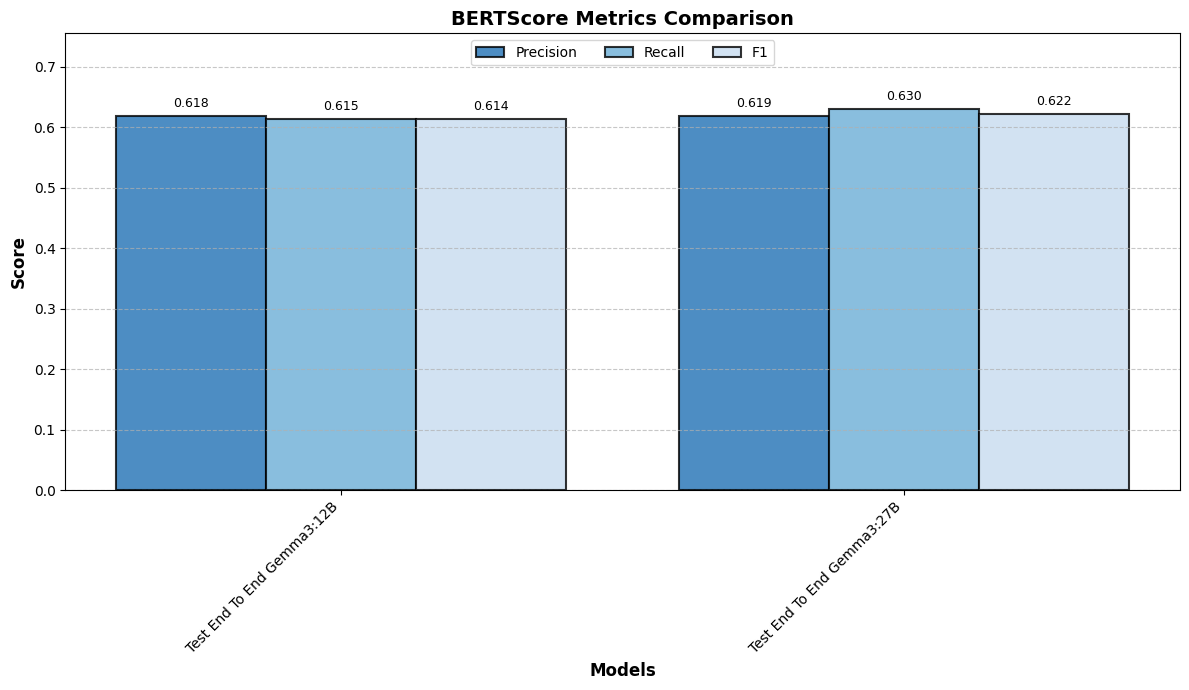

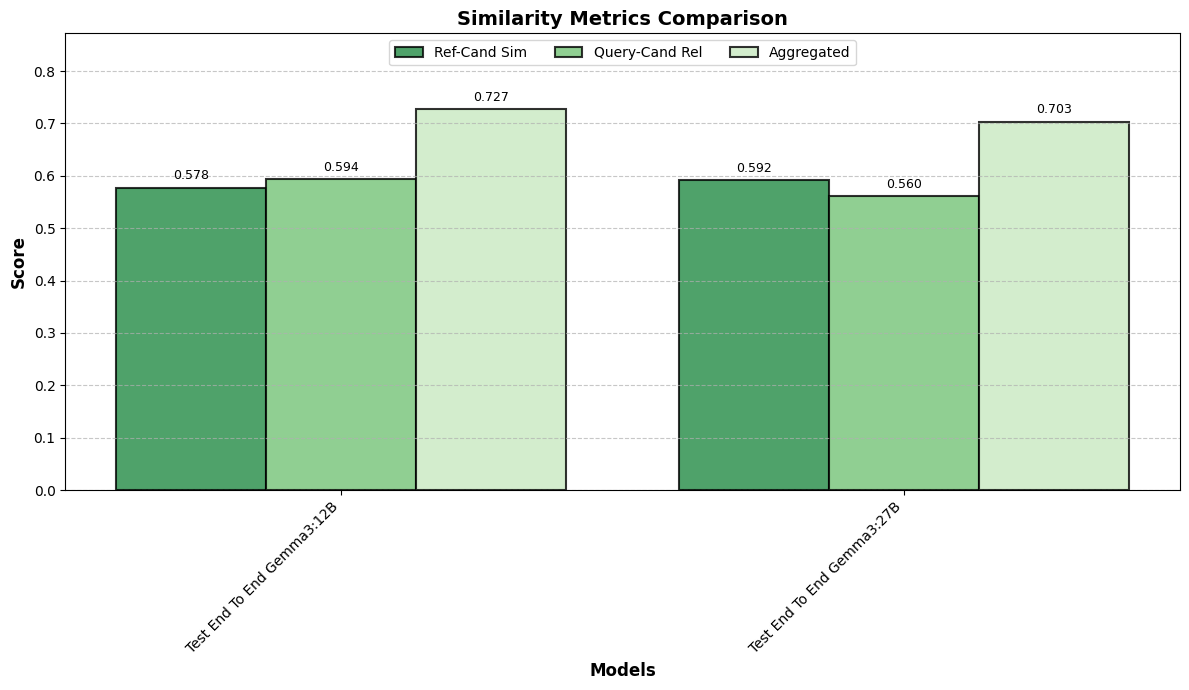

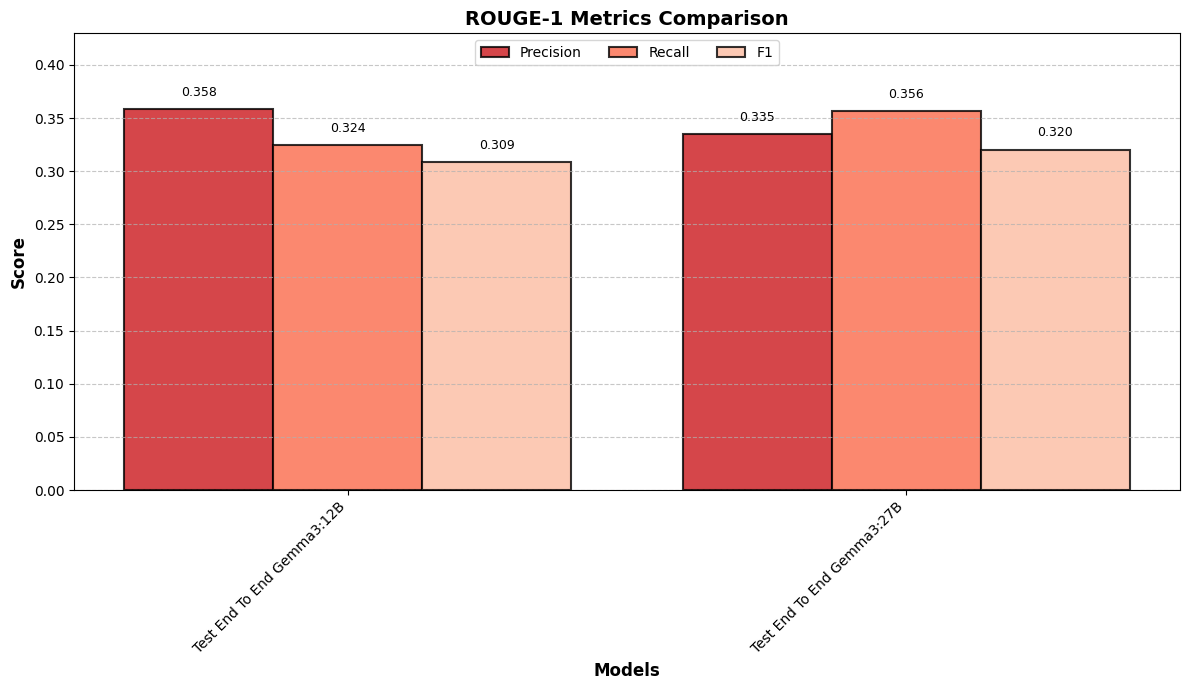

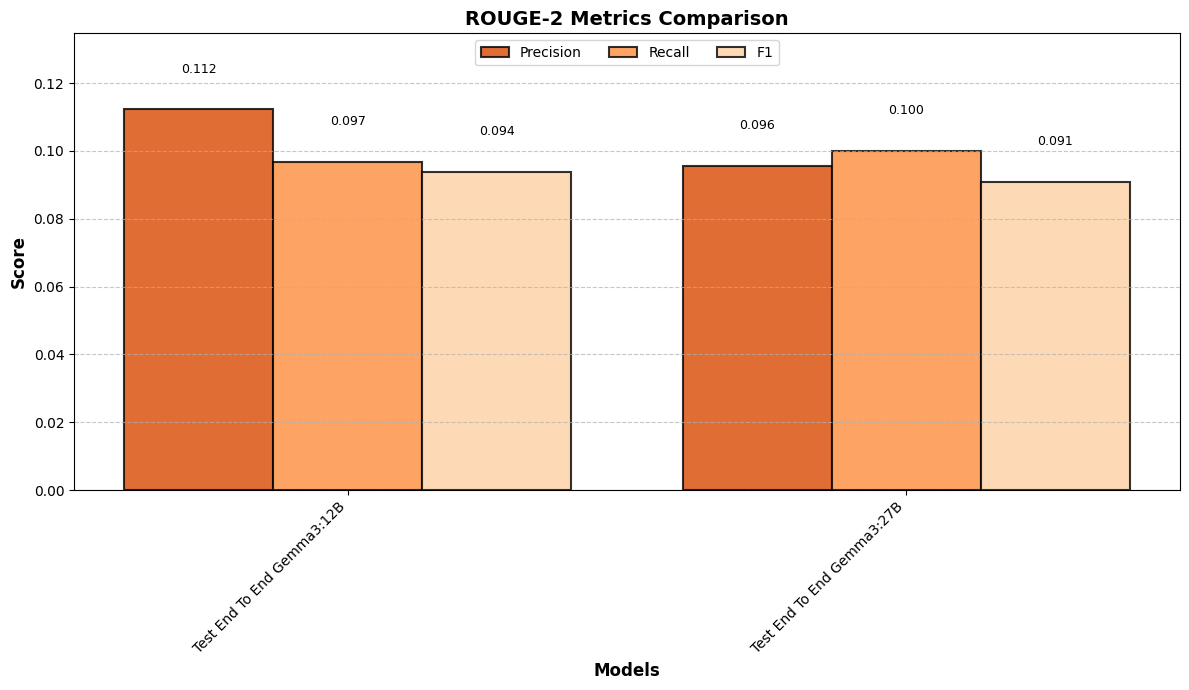

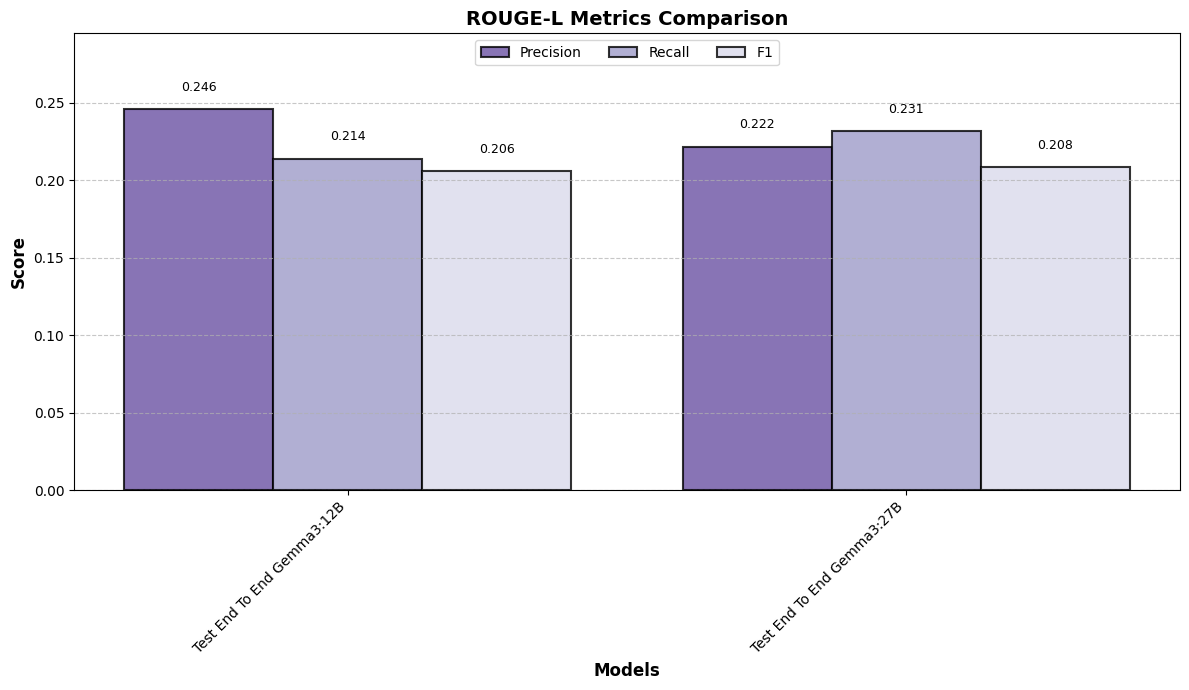

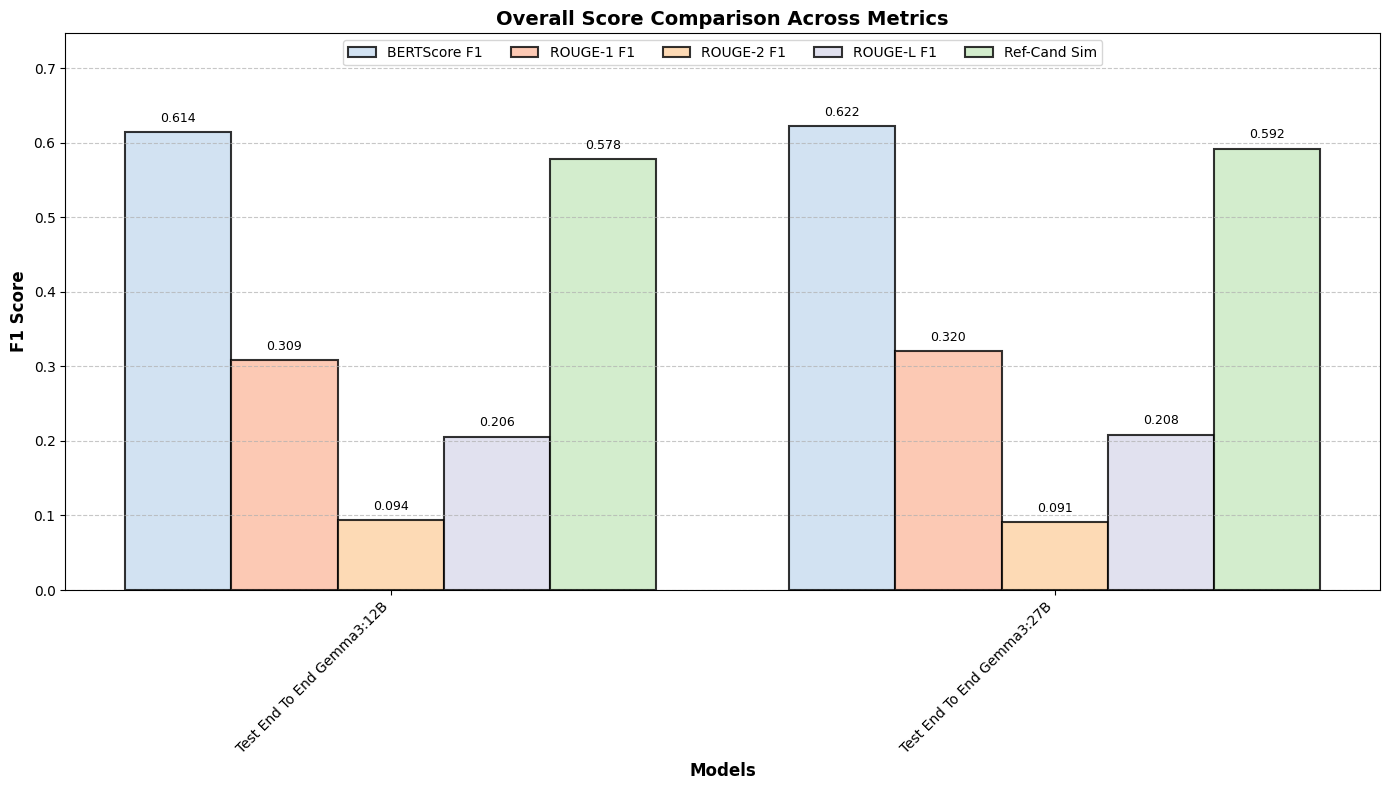

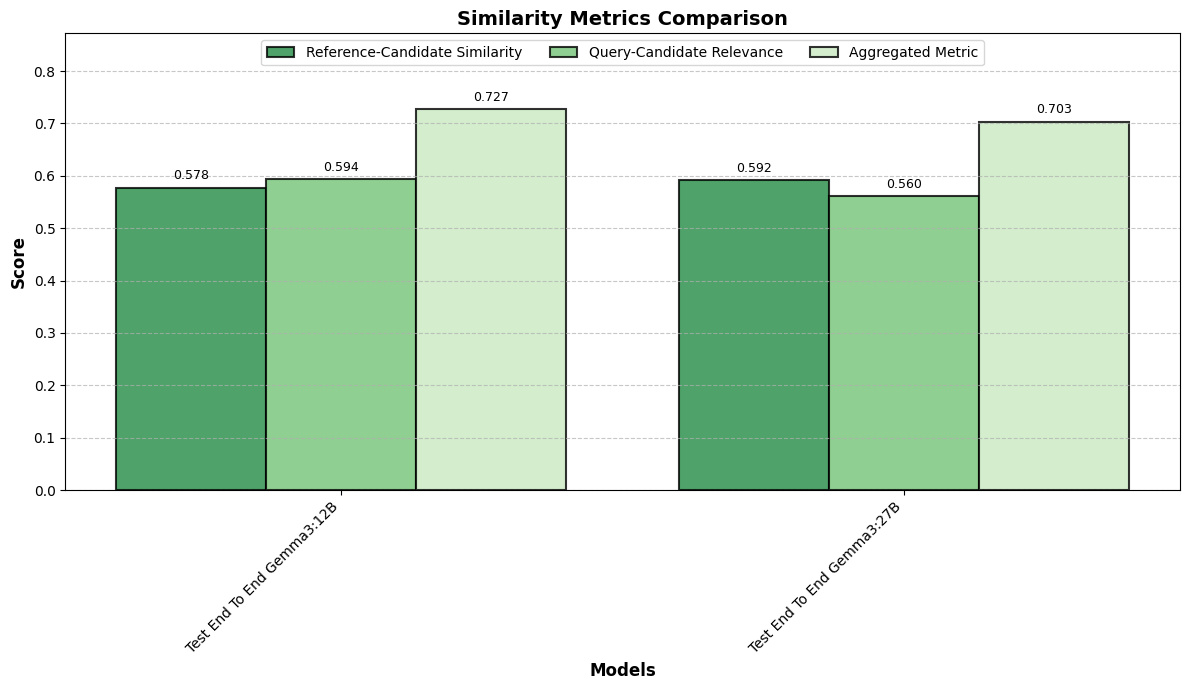

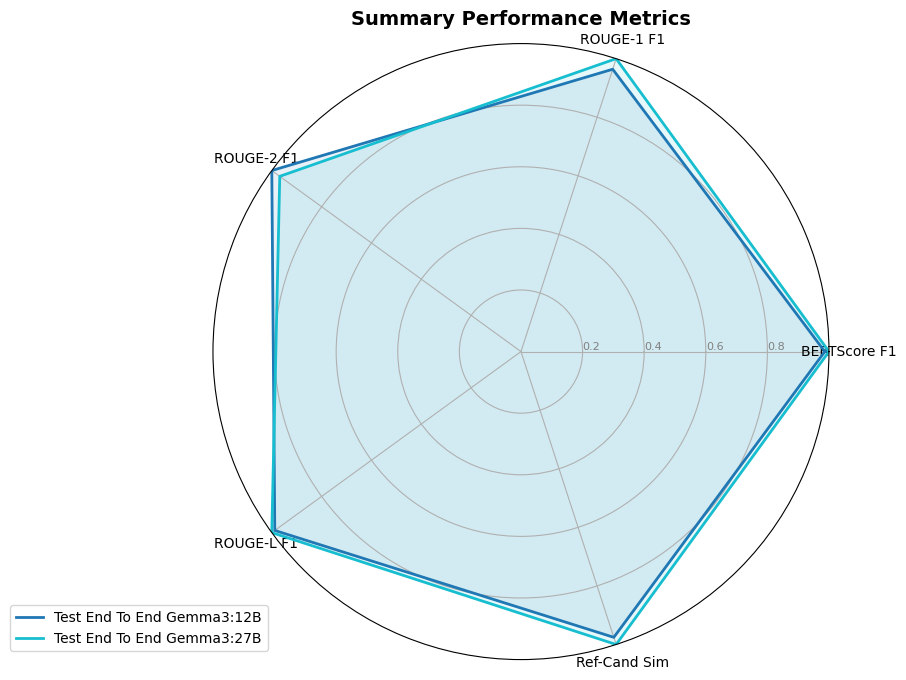

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

def visualize_metrics(csv_path="evaluation_end_to_end_summary_report.csv"):
    """
    Create visualizations for evaluation metrics from the summary report CSV.
    """
    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Error: {csv_path} not found. Please run the evaluation script first.")
        return
    
    # Load the data
    df = pd.read_csv(csv_path)
    
    # Extract model names from file names for better display
    df['model_name'] = df['file_name'].apply(
        lambda x: os.path.splitext(x)[0].replace('qmsum_predictions_', '').replace('_', ' ').title()
    )
    
    # Group metrics by type for visualization
    metric_groups = {
        'BERTScore': ['bertscore_precision', 'bertscore_recall', 'bertscore_f1'],
        'Similarity': ['ref_cand_sim', 'query_cand_relevance', 'aggregated_metric'],
        'ROUGE-1': ['rouge1_precision', 'rouge1_recall', 'rouge1_f1'],
        'ROUGE-2': ['rouge2_precision', 'rouge2_recall', 'rouge2_f1'],
        'ROUGE-L': ['rougeL_precision', 'rougeL_recall', 'rougeL_f1']
    }
    
    # Prettier names for metrics
    metric_names = {
        'bertscore_precision': 'Precision',
        'bertscore_recall': 'Recall',
        'bertscore_f1': 'F1',
        'ref_cand_sim': 'Ref-Cand Sim',
        'query_cand_relevance': 'Query-Cand Rel',
        'aggregated_metric': 'Aggregated',
        'rouge1_precision': 'Precision',
        'rouge1_recall': 'Recall',
        'rouge1_f1': 'F1',
        'rouge2_precision': 'Precision',
        'rouge2_recall': 'Recall',
        'rouge2_f1': 'F1',
        'rougeL_precision': 'Precision',
        'rougeL_recall': 'Recall',
        'rougeL_f1': 'F1'
    }
    
    # Color schemes for different metric groups
    color_schemes = {
        'BERTScore': sns.color_palette("Blues_r", 3),
        'Similarity': sns.color_palette("Greens_r", 3),
        'ROUGE-1': sns.color_palette("Reds_r", 3),
        'ROUGE-2': sns.color_palette("Oranges_r", 3),
        'ROUGE-L': sns.color_palette("Purples_r", 3)
    }
    
    # Figure setup - create individual plots for each metric group
    for group_name, metrics in metric_groups.items():
        plt.figure(figsize=(12, 7))
        
        # Set up the plot
        n_models = len(df)
        n_metrics = len(metrics)
        bar_width = 0.8 / n_metrics
        index = np.arange(n_models)
        
        # Create bars for each metric within this group
        for i, metric in enumerate(metrics):
            offset = (i - n_metrics/2 + 0.5) * bar_width
            bars = plt.bar(
                index + offset, 
                df[metric],
                bar_width,
                label=metric_names[metric],
                color=color_schemes[group_name][i],
                edgecolor='black',
                linewidth=1.5,
                alpha=0.8
            )
            
            # Add text labels on top of bars
            for bar in bars:
                height = bar.get_height()
                plt.text(
                    bar.get_x() + bar.get_width()/2.,
                    height + 0.01,
                    f'{height:.3f}',
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    rotation=0
                )
        
        # Enhance the plot style
        plt.xlabel('Models', fontweight='bold', fontsize=12)
        plt.ylabel('Score', fontweight='bold', fontsize=12)
        plt.title(f'{group_name} Metrics Comparison', fontweight='bold', fontsize=14)
        plt.xticks(index, df['model_name'], rotation=45, ha='right')
        plt.ylim(0, min(1.0, df[metrics].max().max() * 1.2))  # Cap at 1.0 since metrics are normalized
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=n_metrics)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'./output_end_to_end/{group_name.lower().replace("-", "_")}_metrics.png', dpi=300, bbox_inches='tight')
        print(f"Saved {group_name} metrics visualization")
    
    # Create a combined visualization for all F1 scores
    plt.figure(figsize=(14, 8))
    
    f1_metrics = ['bertscore_f1', 'rouge1_f1', 'rouge2_f1', 'rougeL_f1', 'ref_cand_sim']
    f1_names = ['BERTScore F1', 'ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'Ref-Cand Sim']
    f1_colors = [color_schemes[group][2] for group in ['BERTScore', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'Similarity']]
    
    n_models = len(df)
    n_metrics = len(f1_metrics)
    bar_width = 0.8 / n_metrics
    index = np.arange(n_models)
    
    for i, (metric, name) in enumerate(zip(f1_metrics, f1_names)):
        offset = (i - n_metrics/2 + 0.5) * bar_width
        bars = plt.bar(
            index + offset, 
            df[metric],
            bar_width,
            label=name,
            color=f1_colors[i],
            edgecolor='black',
            linewidth=1.5,
            alpha=0.8
        )
        
        # Add text labels
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2.,
                height + 0.01,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=9,
                rotation=0
            )
    
    plt.xlabel('Models', fontweight='bold', fontsize=12)
    plt.ylabel('F1 Score', fontweight='bold', fontsize=12)
    plt.title('Overall Score Comparison Across Metrics', fontweight='bold', fontsize=14)
    plt.xticks(index, df['model_name'], rotation=45, ha='right')
    plt.ylim(0, min(1.0, df[f1_metrics].max().max() * 1.2))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=n_metrics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.savefig('./output_end_to_end/f1_comparison.png', dpi=300, bbox_inches='tight')
    print("Saved F1 comparison visualization")
    
    # Create a similarity metrics comparison
    plt.figure(figsize=(12, 7))
    
    sim_metrics = ['ref_cand_sim', 'query_cand_relevance', 'aggregated_metric']
    sim_names = ['Reference-Candidate Similarity', 'Query-Candidate Relevance', 'Aggregated Metric']
    sim_colors = color_schemes['Similarity']
    
    n_models = len(df)
    n_metrics = len(sim_metrics)
    bar_width = 0.8 / n_metrics
    index = np.arange(n_models)
    
    for i, (metric, name) in enumerate(zip(sim_metrics, sim_names)):
        offset = (i - n_metrics/2 + 0.5) * bar_width
        bars = plt.bar(
            index + offset, 
            df[metric],
            bar_width,
            label=name,
            color=sim_colors[i],
            edgecolor='black',
            linewidth=1.5,
            alpha=0.8
        )
        
        # Add text labels
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2.,
                height + 0.01,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=9,
                rotation=0
            )
    
    plt.xlabel('Models', fontweight='bold', fontsize=12)
    plt.ylabel('Score', fontweight='bold', fontsize=12)
    plt.title('Similarity Metrics Comparison', fontweight='bold', fontsize=14)
    plt.xticks(index, df['model_name'], rotation=45, ha='right')
    plt.ylim(0, df[sim_metrics].max().max() * 1.2)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=n_metrics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.savefig('./output_end_to_end/similarity_metrics.png', dpi=300, bbox_inches='tight')
    print("Saved similarity metrics visualization")
    
    # Create a summary radar chart
    if len(df) <= 9:  # Radar charts work well with limited number of models
        # only include [gemma3:27b, deepseek-r1:32b, gemini-2-flash, baseline_lorem]
        # print(df['model_name'])
        # df = df[df['model_name'].isin(['Test Gemini-2.0-Flash', 'Test Gemma3:27B', 'Test Deepseek-R1:32B', 'Test Baseline Lorem'])]
        # Prepare data for radar chart

        print(df)
        for col in df.columns[1:-1]:
            # Normalize the column by dividing by the max value
            df[col] = df[col] / df[col].max()

        categories = ['BERTScore F1', 'ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'Ref-Cand Sim']
        metrics_for_radar = ['bertscore_f1', 'rouge1_f1', 'rouge2_f1', 'rougeL_f1', 'ref_cand_sim']

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, polar=True)

        # Number of variables
        N = len(categories)

        # Compute angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]  # Close the loop

        # Set the labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color="grey", size=8)
        plt.ylim(0, 1)

        # Get a color palette
        colors = plt.cm.tab10(np.linspace(0, 1, len(df)))

        # Plot each model
        for i, row in df.iterrows():
            values = [row[metric] if row[metric] > 0 else 0 for metric in metrics_for_radar]
            values += values[:1]  # Close the loop

            # Plot values
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['model_name'], color=colors[i])
            ax.fill(angles, values, alpha=0.1, color=colors[i])

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title('Summary Performance Metrics', fontweight='bold', fontsize=14)

        plt.savefig('./output_end_to_end/radar_summary.png', dpi=300, bbox_inches='tight')
        print("Saved radar chart summary")

if __name__ == "__main__":
    visualize_metrics()
    print("Visualization complete. Check the current directory for PNG files.")

In [5]:
df = pd.read_csv("evaluation_end_to_end_summary_report.csv")
# normalize each column except the first one
for col in df.columns[1:]:
    # Normalize the column by dividing by the max value
    df[col] = df[col] / df[col].max()

df

,file_name,bertscore_precision,bertscore_recall,bertscore_f1,ref_cand_sim,query_cand_relevance,aggregated_metric,rouge1_precision,rouge1_recall,rouge1_f1,rouge2_precision,rouge2_recall,rouge2_f1,rougeL_precision,rougeL_recall,rougeL_f1
0,test_end_to_end_gemma3:12b.csv,0.998827,0.976038,0.986541,0.975524,1.000000,1.000000,1.000000,0.910408,0.963895,1.000000,0.967739,1.00000,1.000000,0.924406,0.987996
1,test_end_to_end_gemma3:27b.csv,1.000000,1.000000,1.000000,1.000000,0.943971,0.967824,0.935077,1.000000,1.000000,0.852256,1.000000,0.96801,0.902482,1.000000,1.000000
